Felzenszwalb number of segments: 1052
SLIC number of segments: 252


Text(0.5, 1.0, 'Compact watershed')

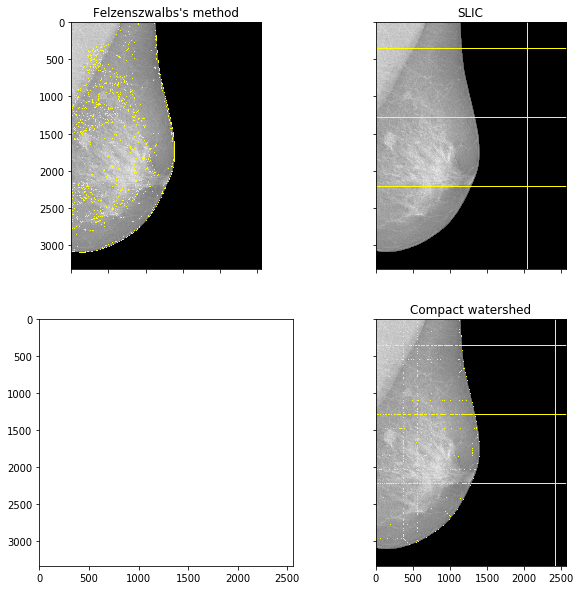

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from PIL import Image

#img = img_as_float(astronaut()[::2, ::2])
img = Image.open('/Users/nikhil/Downloads/attachments 2/image/20588216_image.png')


segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz))))
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")



segments_slic = slic(img, n_segments=250, compactness=10, sigma=1)
print('SLIC number of segments: {}'.format(len(np.unique(segments_slic))))
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')





gradient = sobel(img)
segments_watershed = watershed(gradient, markers=250, compactness=0.001)
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')


In [12]:
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
print('Quickshift number of segments: {}'.format(len(np.unique(segments_quick))))

ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')

ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (3328, 2560, 1)

Text(0.5, 1.0, 'Compact watershed')

In [2]:
import caffe
net = caffe.Segmenter(MODEL_FILE, PRETRAINED)
IMAGE_FILE = '/Users/nikhil/Downloads/attachments 2/image/20588216_image.png'
input_image = caffe.io.load_image(IMAGE_FILE)
from PIL import Image as PILImage
image = PILImage.fromarray(np.uint8(input_image))
image = np.array(image)






mean_vec = [np.mean(image[:,:,vals]) for vals in range(image.shape[2])]
im = image[:, :, ::-1]
im = im - reshaped_mean_vec
cur_h, cur_w, cur_c = im.shape
pad_h = 750 - cur_h
pad_w = 750 - cur_w
print(pad_h, pad_w, "999")
im = np.pad(im, pad_width=((0, max(pad_h,0)), (0, max(pad_w,0)), (0, 0)), mode = 'constant', constant_values = 255)
segmentation = net.predict([im])
segmentation2 = segmentation[0:cur_h, 0:cur_w]

ModuleNotFoundError: No module named 'caffe'